In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
import json
from nltk.corpus import stopwords
import nltk
from string import punctuation
import threading
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('twitter_training.csv', header=None)

In [3]:
data.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
data.drop(0, inplace=True, axis=1)

In [5]:
data.head()

,1,2,3
0,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [6]:
data.columns = ['game_name', 'flag', 'text']

In [7]:
data.head()

,game_name,flag,text
0,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   game_name  74682 non-null  object
 1   flag       74682 non-null  object
 2   text       73996 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [9]:
data.dropna(axis=0, inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73996 entries, 0 to 74681
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   game_name  73996 non-null  object
 1   flag       73996 non-null  object
 2   text       73996 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


In [11]:
data.reset_index(inplace=True, drop=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73996 entries, 0 to 73995
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   game_name  73996 non-null  object
 1   flag       73996 non-null  object
 2   text       73996 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [13]:
data.head()

,game_name,flag,text
0,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [14]:
def foo(chunk):
    for i in range(len(chunk)):
        tokens = nltk.tokenize.word_tokenize(chunk.iloc[i])
        lemmatizer = nltk.stem.WordNetLemmatizer()
        cleared_text = [word for word in tokens if word not in stopwords.words('english') and word not in punctuation+'’' and word not in ['...', '``', '..', '\'\'']]
        lemmatized_text = [lemmatizer.lemmatize(word).lower() for word in cleared_text]
        chunk.iloc[i] = " ".join(lemmatized_text)

def processing(data, num_threads):
    chunk_size = len(data) // num_threads
    chunks = [data[i:i+chunk_size] for i in range(0, len(data), chunk_size)]
    threads = []
    for chunk in chunks:
        thread = threading.Thread(target=lambda c: foo(c), args=(chunk,))
        thread.start()
        threads.append(thread)

    for thread in threads:
        thread.join()

In [17]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HAWK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HAWK\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
processing(data.text, 12)

In [19]:
data.head()

,game_name,flag,text
0,Borderlands,Positive,im getting borderland murder
1,Borderlands,Positive,i coming border i kill
2,Borderlands,Positive,im getting borderland kill
3,Borderlands,Positive,im coming borderland murder
4,Borderlands,Positive,im getting borderland 2 murder


In [20]:
val_data = pd.read_csv('twitter_validation.csv', header=None)
val_data.drop(0, axis=1, inplace=True)
val_data.columns = ['game_name', 'flag', 'text']

In [21]:
val_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   game_name  1000 non-null   object
 1   flag       1000 non-null   object
 2   text       1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [22]:
val_data.head()

,game_name,flag,text
0,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Google,Neutral,Now the President is slapping Americans in the...


In [23]:
processing(val_data.text, 12)

In [24]:
val_data.head()

,game_name,flag,text
0,Facebook,Irrelevant,i mentioned facebook i struggling motivation g...
1,Amazon,Neutral,bbc news amazon bos jeff bezos reject claim co...
2,Microsoft,Negative,microsoft why i pay word function poorly samsu...
3,CS-GO,Negative,csgo matchmaking full closet hacking 's truly ...
4,Google,Neutral,now president slapping americans face really c...


In [25]:
set(data.game_name.unique()) == set(val_data.game_name.unique())

True

In [26]:
train_data = data.copy(deep=True)

In [76]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(
    num_words=5000,
)

In [65]:
train, test = train_test_split(train_data, test_size=0.2, stratify=train_data.flag)

In [77]:
tokenizer.fit_on_texts(train.text)

In [78]:
train_data_text = tf.keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences(train.text), maxlen=128, padding='post')
test_data_text = tf.keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences(test.text), maxlen=128, padding='post')
valid_data_text = tf.keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences(val_data.text), maxlen=128, padding='post')

In [79]:
json_ = tokenizer.to_json()

In [80]:
with open('tokenizer', 'w') as file:
    file.write(json_)

In [81]:
game_name_encoder = LabelEncoder()
flag_encoder = LabelEncoder()

In [57]:
train_data.game_name = game_name_encoder.fit_transform(train_data.game_name)
val_data.game_name = game_name_encoder.transform(val_data.game_name)
train_data.flag = flag_encoder.fit_transform(train_data.flag)
val_data.flag = flag_encoder.transform(val_data.flag)

In [82]:
np.save('train', train_data_text)
np.save('valid', valid_data_text)
np.save('test', test_data_text)

In [83]:
val_data.to_csv('valid_cleared.csv')
train.to_csv('training_cleared.csv')
test.to_csv('test_cleared.csv')

<BarContainer object of 4 artists>

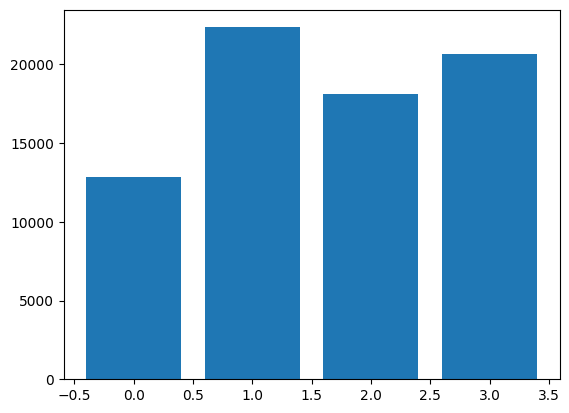

In [42]:
plt.bar(np.unique(train_data.flag), np.unique(train_data.flag, return_counts=True)[1])

In [2]:
logs = pd.read_csv('logs')

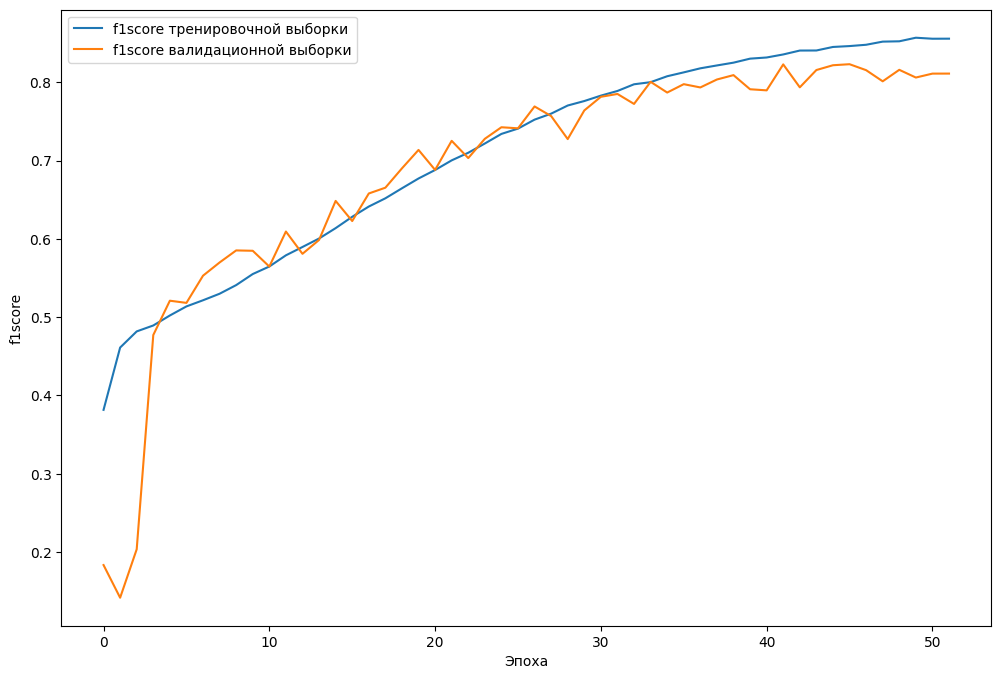

In [8]:
plt.figure(figsize=(12,8))
plt.plot(logs['epoch'], logs['f1score'], label='f1score тренировочной выборки')
plt.plot(logs['epoch'], logs['val_f1score'], label='f1score валидационной выборки')
plt.legend()
plt.xlabel('Эпоха')
plt.ylabel('f1score')
plt.show()

Скрин с обучением и метриками на тестовой выборке: https://prnt.sc/VXb5D0SIt-3A

Во время выполнения я пробовал TFIDF векторизатор, но с ним обучение шло целую вечность и он засорял мне память, при этом метрики были хуже, чем с токензатором из tensorflow. Архитектура модельки из LSTM, но я решил еще подвязать к входным параметрам класс игры/компании(столбец game_name). Судя по графику, можно было бы продолжить обучение, но у меня сработал коллбек на раннюю остановку. При обработке удалял стоп слова используя nltk и процесс шел в многопоточном режиме, т.к. в один поток процесс занял бы минут 20, а так - 3.5минуты. Результат модели на тестовой выборке на скриншотике по ссылке.